written by Charlie Moffett, NYU CUSP 2017

__Assignment 2: Compare Tests for Goodness of fit__

In [2]:
# the usual imports and setups
from __future__ import print_function, division
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

import os

#plus importing scipy.stats
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


Testing the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson using:

1) KS

2) AD

3) KL

4) Pearson's chisq


## Establishing the distributions

In [14]:
np.random.seed(999)
# Normal Distribution
dist_n = np.random.randn(1000) 

# Poisson with 1000 elements, lambda=100 (high)
dist_p = (np.random.poisson(100, 1000) - 100) * 0.1 #-100 fixes mean, *0.1 fixes stdev

# Binomial with n=10, p=0.5 => mean=np=5, stdev=sqrt(np(1-p))
n, p = 200, 0.5
dist_b = (np.random.binomial(n, p, 1000) - n * p) / np.sqrt(n * p * (1 - p))  #subtract mean divide by stdev

## Poisson
$H_0$: The sample distribution comes from a Gaussian distribution

$\alpha$ = 0.05

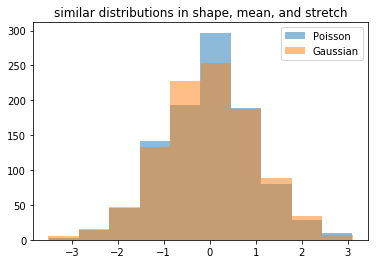

In [15]:
# Plot Poisson and Normal
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions in shape, mean, and stretch")
pl.xlabel('')
pl.show()

In [16]:
# KS and AD tests for Poisson
print("poisson vs normal", scipy.stats.kstest(dist_p,'norm'))
print("poisson vs normal", scipy.stats.anderson(dist_p, dist='norm'))

poisson vs normal KstestResult(statistic=0.041740290560897009, pvalue=0.059619612194260485)
poisson vs normal AndersonResult(statistic=0.73890973987863617, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [20]:
#KL and Chi-Square tests for Poisson
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])

print("\nKL Test:", scipy.stats.entropy(distpdf_p, scipy.stats.norm.pdf(bincenters_p)))
print("\nPearson's Chi-Squared:"), scipy.stats.chisquare(dist_p, dist_n)


KL Test: 0.00839622972877

Pearson's Chi-Squared:


(None, Power_divergenceResult(statistic=-1002.1292091913111, pvalue=1.0))

### Poisson Results Discussion

KS: no longer rejecting the H0 at alpha=0.05 (p~0.06)

AD: statistics AD=0.93 smaller than threshold (for alpha=0.05)

KL: statistics KL=0.008 small >> difference in entropy b/w our sample distribution and our Gaussian parameter is small

Chi-Square: ???

# Binomial
$H_0$: The sample distribution comes from a Gaussian distribution

$\alpha$ = 0.05

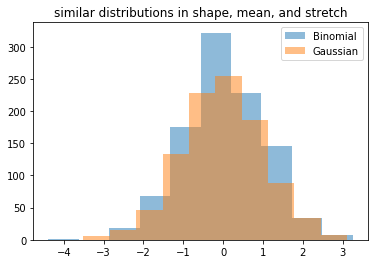

In [18]:
# Plot Poisson and Normal
pl.hist(dist_b, alpha=0.5, label="Binomial")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions in shape, mean, and stretch")
pl.show()

In [19]:
# KS and AD tests for Binomial
print("Binomial vs Normal", scipy.stats.kstest(dist_b,'norm'))
print("Binomial vs Normal", scipy.stats.anderson(dist_b, dist='norm'))

Binomial vs Normal KstestResult(statistic=0.039249938906523285, pvalue=0.089410703261557201)
Binomial vs Normal AndersonResult(statistic=1.0237763896500383, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [21]:
#KL and Chi-Square tests for Binomial
distpdf_b, mybins_b = np.histogram(dist_b, density=True)
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])

print ("\nKL Test:", scipy.stats.entropy(distpdf_b, scipy.stats.norm.pdf(bincenters_b)))

#Running the Chi-Square test for Poisson
print ("\nPearson's Chi-Squared - "), scipy.stats.chisquare(dist_b, dist_n)


KL Test: 0.0098198635024

Pearson's Chi-Squared - 


(None, Power_divergenceResult(statistic=-891.67250909612824, pvalue=1.0))

### Binomial Results Discussion

KS: no longer rejecting the H0 at alpha=0.05 (p~0.09)

AD: statistics AD=1.02 larger than threshold (for alpha=0.05)

KL: statistics KL=0.01 small >> difference in entropy b/w our sample distribution and our Gaussian parameter is small

Chi-Square: ???

# Increasing lambda parameter of Poisson distribution

In [22]:
np.random.seed(999)

pois_KS_p_values = []
pois_KS_s_values = []
pois_AD_s_values = []
pois_KL_s_values = []
pois_CS_s_values = []
AD_threshold = 0.784

for i,n in enumerate(mean_array):
    lam = n 
    
    #Create The Distributions
    dist = (np.random.poisson(lam, 1000) - lam) * (1/np.sqrt(lam))
    norm = np.random.randn(1000) 
    
    #Determine the KS stats-values
    KS_s_value = scipy.stats.kstest(dist,'norm')[0]
    pois_KS_s_values.append(KS_s_value)
    
    #Determine the KS p-values
    KS_p_value = scipy.stats.kstest(dist,'norm')[1]
    pois_KS_p_values.append(KS_p_value)
    
    #Determine the AD stat-values
    AD_s_value = scipy.stats.anderson(dist,'norm')[0]
    pois_AD_s_values.append(AD_s_value)
    
    #Determine the KL statistic
    pdfBinom, binomBins, = np.histogram(dist, density=True)
    binomBinCent = binomBins[:-1] + 0.5*(binomBins[1] - binomBins[0])
    KL_s_value = scipy.stats.entropy(pdfBinom, scipy.stats.norm.pdf(binomBinCent))
    pois_KL_s_values.append(KL_s_value)  
    
    #Determine the Chi-Squ values
    CS_s_value = scipy.stats.chisquare(dist, norm)[1]
    pois_CS_s_values.append(CS_s_value)

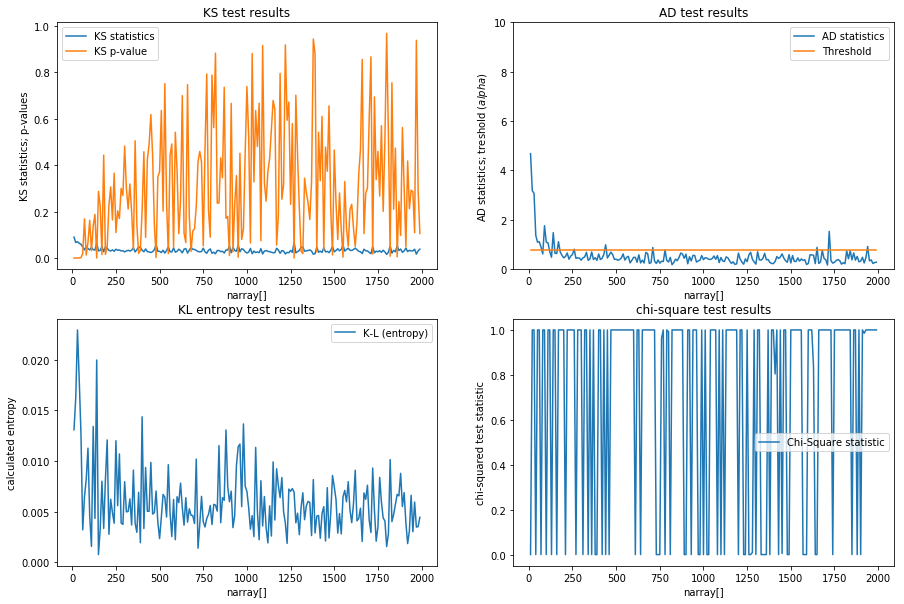

In [25]:
#Plotting

#KS Test
fig = pl.figure(figsize = (15,10))
fig.add_subplot(221)
pl.plot(mean_array, pois_KS_s_values, label='KS statistics')
pl.plot(mean_array, pois_KS_p_values, label='KS p-value')
pl.title('KS test results')
pl.xlabel('narray[]')
pl.ylabel('KS statistics; p-values')
pl.legend()


#AD Test
fig.add_subplot(222)
pl.plot(mean_array, pois_AD_s_values,  label='AD statistics')
pl.plot([mean_array[0], mean_array[-1]],[AD_threshold, AD_threshold], label="Threshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.title('AD test results')
pl.xlabel('narray[]')
pl.ylabel('AD statistics; treshold ($alpha$)')
pl.legend()

#KL Test
fig.add_subplot(223)
pl.plot(mean_array, pois_KL_s_values, label='K-L (entropy)')
pl.title('KL entropy test results')
pl.xlabel('narray[]')
pl.ylabel('calculated entropy')
pl.legend();

#Chi-Square Test
fig.add_subplot(224)
pl.plot(mean_array, pois_CS_s_values, label='Chi-Square statistic')
pl.title('chi-square test results')
pl.xlabel('narray[]')
pl.ylabel('chi-squared test statistic')
pl.legend();

### Increased Lambda Results Discussion

KS: gets harder to reject the H0 at alpha=0.05 (p~0.09) as stats decrease and p-values increase

AD: statistics fall consistently below threshold >> harder to reject H0

KL: decreasing entropy b/w our sample distribution and our Gaussian parameter >> need less approx. to represent as Normal

Chi-Square: As hard as we tried we couldn't nail down the chi-square plot.